In [31]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

df_conners = pd.read_csv('Data/df_connors')
df_behavioral = pd.read_csv('Data/df_behavioral')
df_eeg = pd.read_csv('Data/df_eeg')
print(df_conners.dtypes)

Unnamed: 0      int64
id              int64
Gender          int64
cIM           float64
cHR           float64
cIE           float64
cSC           float64
dtype: object


### First, let's look at our Conners data 

In [3]:
df_conners

,Unnamed: 0,id,Gender,cIM,cHR,cIE,cSC
0,0,1,1,17.0,31.0,29.0,9.0
1,1,3,1,10.0,5.0,13.0,1.0
2,2,4,1,26.0,17.0,7.0,15.0
3,3,7,1,24.0,8.0,6.0,14.0
4,5,11,1,16.0,26.0,13.0,10.0
...,...,...,...,...,...,...,...
91,95,602,1,25.0,14.0,20.0,18.0
92,96,603,1,32.0,15.0,14.0,15.0
93,97,700,2,13.0,33.0,14.0,11.0
94,98,701,1,22.0,17.0,15.0,12.0


In [8]:
df_conners.describe()

,Unnamed: 0,id,Gender,cIM,cHR,cIE,cSC
count,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000
mean,50.270833,161.187500,1.40625,21.843750,17.687500,14.479167,9.645833
std,28.773701,177.400962,0.49371,6.695369,7.646551,7.014240,4.262392
min,0.000000,1.000000,1.00000,5.000000,3.000000,2.000000,0.000000
25%,25.750000,42.750000,1.00000,18.000000,12.750000,8.750000,7.000000
50%,50.500000,82.500000,1.00000,23.000000,17.000000,15.000000,10.000000
75%,74.250000,212.250000,2.00000,26.250000,24.000000,18.000000,12.000000
max,99.000000,702.000000,2.00000,33.000000,33.000000,30.000000,18.000000


In [12]:
df_conners.groupby(['Gender', 'cIM', 'cHR', 'cIE', 'cSC']).describe()


Unnamed: 0                                          \
                                count  mean std   min   25%   50%   75%   max   
Gender cIM  cHR  cIE  cSC                                                       
1      8.0  11.0 7.0  2.0         1.0  22.0 NaN  22.0  22.0  22.0  22.0  22.0   
       10.0 5.0  13.0 1.0         1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   
       12.0 8.0  7.0  7.0         1.0  93.0 NaN  93.0  93.0  93.0  93.0  93.0   
       14.0 7.0  17.0 5.0         1.0  62.0 NaN  62.0  62.0  62.0  62.0  62.0   
            8.0  6.0  5.0         1.0   7.0 NaN   7.0   7.0   7.0   7.0   7.0   
...                               ...   ...  ..   ...   ...   ...   ...   ...   
2      30.0 15.0 16.0 6.0         1.0  54.0 NaN  54.0  54.0  54.0  54.0  54.0   
            19.0 21.0 11.0        1.0  65.0 NaN  65.0  65.0  65.0  65.0  65.0   
       31.0 33.0 22.0 10.0        1.0  10.0 NaN  10.0  10.0  10.0  10.0  10.0   
       32.0 13.0 15.0 11.0        1.0  20.0 NaN  20.0  20.0  20.0  20.0  20.0   
       33.0 32.0 30.0 7.0         1.0  70.0 NaN  70.0  70.0  70.0  70.0  70.0   

                              id                                                
                           count   mean std    min    25%    50%    75%    max  
Gender cIM  cHR  cIE  cSC                                                       
1      8.0  11.0 7.0  2.0    1.0   33.0 NaN   33.0   33.0   33.0   33.0   33.0  
       10.0 5.0  13.0 1.0    1.0    3.0 NaN    3.0    3.0    3.0    3.0    3.0  
       12.0 8.0  7.0  7.0    1.0  417.0 NaN  417.0  417.0  417.0  417.0  417.0  
       14.0 7.0  17.0 5.0    1.0  103.0 NaN  103.0  103.0  103.0  103.0  103.0  
            8.0  6.0  5.0    1.0   13.0 NaN   13.0   13.0   13.0   13.0   13.0  
...                          ...    ...  ..    ...    ...    ...    ...    ...  
2      30.0 15.0 16.0 6.0    1.0   87.0 NaN   87.0   87.0   87.0   87.0   87.0  
            19.0 21.0 11.0   1.0  131.0 NaN  131.0  131.0  131.0  131.0  131.0  
       31.0 33.0 22.0 10.0   1.0   17.0 NaN   17.0   17.0   17.0   17.0   17.0  
       32.0 13.0 15.0 11.0   1.0   31.0 NaN   31.0   31.0   31.0   31.0   31.0  
       33.0 32.0 30.0 7.0    1.0  206.0 NaN  206.0  206.0  206.0  206.0  206.0  

[96 rows x 16 columns]

### Now, let's look at our behavioral data

In [13]:
df_behavioral

,Unnamed: 0,id,Gender,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
0,0,1,1,90.0,91.0,92.0,94.0,80.0,110.0
1,1,3,1,27.0,34.0,41.0,25.0,31.0,38.0
2,2,4,1,93.0,89.0,96.0,90.0,92.0,90.0
3,3,7,1,86.0,66.0,112.0,94.0,90.0,100.0
4,5,11,1,45.0,33.0,78.0,69.0,51.0,94.0
...,...,...,...,...,...,...,...,...,...
91,95,602,1,80.0,87.0,77.0,71.0,71.0,79.0
92,96,603,1,111.0,103.0,118.0,63.0,78.0,56.0
93,97,700,2,83.0,80.0,89.0,70.0,72.0,75.0
94,98,701,1,0.0,20.0,0.0,29.0,32.0,42.0


In [14]:
df_behavioral.describe()

,Unnamed: 0,id,Gender,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
count,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,50.270833,161.187500,1.40625,81.489583,83.479167,83.302083,71.729167,76.593750,73.614583
std,28.773701,177.400962,0.49371,26.171095,25.191469,27.854932,24.971343,22.582983,24.589844
min,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,16.000000,19.000000,8.000000
25%,25.750000,42.750000,1.00000,70.500000,73.750000,69.750000,55.750000,60.000000,55.750000
50%,50.500000,82.500000,1.00000,86.500000,89.000000,89.500000,70.500000,79.500000,73.500000
75%,74.250000,212.250000,2.00000,101.000000,100.250000,104.250000,92.250000,92.500000,94.000000
max,99.000000,702.000000,2.00000,125.000000,127.000000,121.000000,125.000000,132.000000,122.000000


In [15]:
df_behavioral.groupby(['Gender', 'Aqtot', 'Aqaudi', 'Aqvis', 'RCQtot', 'RCQaudi', 'RCQvis']).describe()

Unnamed: 0                  \
                                                     count  mean std   min   
Gender Aqtot Aqaudi Aqvis RCQtot RCQaudi RCQvis                              
1      0.0   20.0   0.0   29.0   32.0    42.0          1.0  98.0 NaN  98.0   
       10.0  13.0   35.0  47.0   44.0    63.0          1.0   8.0 NaN   8.0   
       27.0  34.0   41.0  25.0   31.0    38.0          1.0   1.0 NaN   1.0   
       43.0  46.0   57.0  61.0   67.0    64.0          1.0  93.0 NaN  93.0   
       45.0  33.0   78.0  69.0   51.0    94.0          1.0   5.0 NaN   5.0   
...                                                    ...   ...  ..   ...   
2      115.0 108.0  119.0 95.0   94.0    96.0          1.0  89.0 NaN  89.0   
             114.0  113.0 93.0   97.0    90.0          1.0  72.0 NaN  72.0   
       117.0 118.0  113.0 55.0   67.0    54.0          1.0  64.0 NaN  64.0   
       123.0 122.0  121.0 83.0   102.0   66.0          1.0  70.0 NaN  70.0   
       125.0 127.0  119.0 123.0  132.0   108.0         1.0  13.0 NaN  13.0   

                                                                           id  \
                                                  25%   50%   75%   max count   
Gender Aqtot Aqaudi Aqvis RCQtot RCQaudi RCQvis                                 
1      0.0   20.0   0.0   29.0   32.0    42.0    98.0  98.0  98.0  98.0   1.0   
       10.0  13.0   35.0  47.0   44.0    63.0     8.0   8.0   8.0   8.0   1.0   
       27.0  34.0   41.0  25.0   31.0    38.0     1.0   1.0   1.0   1.0   1.0   
       43.0  46.0   57.0  61.0   67.0    64.0    93.0  93.0  93.0  93.0   1.0   
       45.0  33.0   78.0  69.0   51.0    94.0     5.0   5.0   5.0   5.0   1.0   
...                                               ...   ...   ...   ...   ...   
2      115.0 108.0  119.0 95.0   94.0    96.0    89.0  89.0  89.0  89.0   1.0   
             114.0  113.0 93.0   97.0    90.0    72.0  72.0  72.0  72.0   1.0   
       117.0 118.0  113.0 55.0   67.0    54.0    64.0  64.0  64.0  64.0   1.0   
       123.0 122.0  121.0 83.0   102.0   66.0    70.0  70.0  70.0  70.0   1.0   
       125.0 127.0  119.0 123.0  132.0   108.0   13.0  13.0  13.0  13.0   1.0   

                                                                          \
                                                  mean std    min    25%   
Gender Aqtot Aqaudi Aqvis RCQtot RCQaudi RCQvis                            
1      0.0   20.0   0.0   29.0   32.0    42.0    701.0 NaN  701.0  701.0   
       10.0  13.0   35.0  47.0   44.0    63.0     14.0 NaN   14.0   14.0   
       27.0  34.0   41.0  25.0   31.0    38.0      3.0 NaN    3.0    3.0   
       43.0  46.0   57.0  61.0   67.0    64.0    417.0 NaN  417.0  417.0   
       45.0  33.0   78.0  69.0   51.0    94.0     11.0 NaN   11.0   11.0   
...                                                ...  ..    ...    ...   
2      115.0 108.0  119.0 95.0   94.0    96.0    409.0 NaN  409.0  409.0   
             114.0  113.0 93.0   97.0    90.0    208.0 NaN  208.0  208.0   
       117.0 118.0  113.0 55.0   67.0    54.0    126.0 NaN  126.0  126.0   
       123.0 122.0  121.0 83.0   102.0   66.0    206.0 NaN  206.0  206.0   
       125.0 127.0  119.0 123.0  132.0   108.0    20.0 NaN   20.0   20.0   

                                                                      
                                                   50%    75%    max  
Gender Aqtot Aqaudi Aqvis RCQtot RCQaudi RCQvis                       
1      0.0   20.0   0.0   29.0   32.0    42.0    701.0  701.0  701.0  
       10.0  13.0   35.0  47.0   44.0    63.0     14.0   14.0   14.0  
       27.0  34.0   41.0  25.0   31.0    38.0      3.0    3.0    3.0  
       43.0  46.0   57.0  61.0   67.0    64.0    417.0  417.0  417.0  
       45.0  33.0   78.0  69.0   51.0    94.0     11.0   11.0   11.0  
...                                                ...    ...    ...  
2      115.0 108.0  119.0 95.0   94.0    96.0    409.0  409.0  409.0  
             114.0  113.0 93.0   97.0    90.0

### Finally, let's look at our EEG data

In [16]:
df_eeg

,Unnamed: 0,id,brain_oscillation,freq_band,electrode,fft_abs_power
0,0,1,Delta,1.0-4.0Hz,FP1,15.376173
1,54,1,Alpha,8.0-12.0Hz,T6,6.733474
2,53,1,Alpha,8.0-12.0Hz,P4,14.986348
3,52,1,Alpha,8.0-12.0Hz,Pz,17.861620
4,51,1,Alpha,8.0-12.0Hz,P3,15.938140
...,...,...,...,...,...,...
7291,7621,99,Theta,4.0-8.0Hz,F7,5.575289
7292,7620,99,Theta,4.0-8.0Hz,FP2,7.909238
7293,7618,99,Delta,1.0-4.0Hz,O2,17.114244
7294,7626,99,Theta,4.0-8.0Hz,T3,5.030471


In [17]:
df_eeg.describe()

,Unnamed: 0,id,fft_abs_power
count,7296.000000,7296.000000,7296.000000
mean,3886.583333,161.187500,11.396554
std,2214.609136,176.486675,11.859073
min,0.000000,1.000000,0.818976
25%,1975.750000,42.750000,5.247675
50%,3875.500000,82.500000,8.486325
75%,5851.250000,212.250000,13.742931
max,7675.000000,702.000000,258.114724


In [21]:
df_eeg.groupby(['brain_oscillation', 'electrode']).describe()

Unnamed: 0                                  \
                                 count         mean          std   min   
brain_oscillation electrode                                              
Alpha             C3              96.0  3895.083333  2225.972656  46.0   
                  C4              96.0  3897.083333  2225.972656  48.0   
                  Cz              96.0  3896.083333  2225.972656  47.0   
                  F3              96.0  3890.083333  2225.972656  41.0   
                  F4              96.0  3892.083333  2225.972656  43.0   
...                                ...          ...          ...   ...   
Theta             Pz              96.0  3882.083333  2225.972656  33.0   
                  T3              96.0  3875.083333  2225.972656  26.0   
                  T4              96.0  3879.083333  2225.972656  30.0   
                  T5              96.0  3880.083333  2225.972656  31.0   
                  T6              96.0  3884.083333  2225.972656  35.0   

                                                               id            \
                                25%     50%     75%     max count      mean   
brain_oscillation electrode                                                   
Alpha             C3         2003.0  3884.0  5841.0  7646.0  96.0  161.1875   
                  C4         2005.0  3886.0  5843.0  7648.0  96.0  161.1875   
                  Cz         2004.0  3885.0  5842.0  7647.0  96.0  161.1875   
                  F3         1998.0  3879.0  5836.0  7641.0  96.0  161.1875   
                  F4         2000.0  3881.0  5838.0  7643.0  96.0  161.1875   
...                             ...     ...     ...     ...   ...       ...   
Theta             Pz         1990.0  3871.0  5828.0  7633.0  96.0  161.1875   
                  T3         1983.0  3864.0  5821.0  7626.0  96.0  161.1875   
                  T4         1987.0  3868.0  5825.0  7630.0  96.0  161.1875   
                  T5         1988.0  3869.0  5826.0  7631.0  96.0  161.1875   
                  T6         1992.0  3873.0  5830.0  7635.0  96.0  161.1875   

                             ...                fft_abs_power             \
                             ...     75%    max         count       mean   
brain_oscillation electrode  ...                                           
Alpha             C3         ...  212.25  702.0          96.0  14.816227   
                  C4         ...  212.25  702.0          96.0  14.669763   
                  Cz         ...  212.25  702.0          96.0  15.586763   
                  F3         ...  212.25  702.0          96.0   9.097565   
                  F4         ...  212.25  702.0          96.0   9.420172   
...                          ...     ...    ...           ...        ...   
Theta             Pz         ...  212.25  702.0          96.0  13.214703   
                  T3         ...  212.25  702.0          96.0   4.926751   
                  T4         ...  212.25  702.0          96.0   4.606512   
                  T5         ...  212.25  702.0          96.0   7.401085   
                  T6         ...  212.25  702.0          96.0   7.479236   

                                                                       \
                                   std       min       25%        50%   
brain_oscillation electrode                                             
Alpha             C3         17.001913  1.640155  4.807546   9.676305   
                  C4         17.248843  1.663464  4.967679  10.315598   
                  Cz         13.987136  2.082466  5.636457   9.985657   
                  F3          7.023224  1.411774  4.127160   7.111640   
                  F4          7.477010  1.525239  4.126991   7.350092   
...                                ...       ...       ...        ...   
Theta             Pz         10.196196  3.063776  7.128709  10.451407   
                  T3          2.438685  1.348965  3.158237   4.587008   
                

### We've looked at our means, counts, standard deviations, now let's visualize our distributions and measure their normality

#### Normality is measured using the Shapiro-Wilk test. If the returned value has a p < 0,05; the null hypothesis is rejected, pointing towards a non-normal distribution 
#### Let's start with the Connors dataset

(0.9643755555152893, 0.01037133950740099)

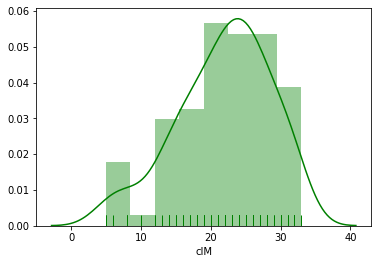

In [50]:
# Plot distribution
sns.distplot(df_conners['cIM'], color='green', rug=True)
# Test data normality
stats.shapiro(df_connors['cIM'])

(0.9751029014587402, 0.06430380046367645)

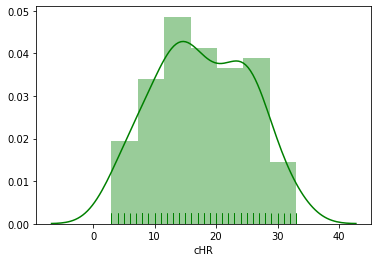

In [51]:
# Plot distribution
sns.distplot(df_conners['cHR'], color='green', rug=True)
# Test data normality
stats.shapiro(df_connors['cHR'])

(0.9726588726043701, 0.04209471866488457)

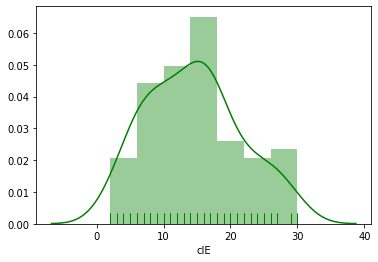

In [52]:
# Plot distribution
sns.distplot(df_conners['cIE'], color='green', rug=True)
# Test data normality
stats.shapiro(df_connors['cIE'])

(0.9814964532852173, 0.19415085017681122)

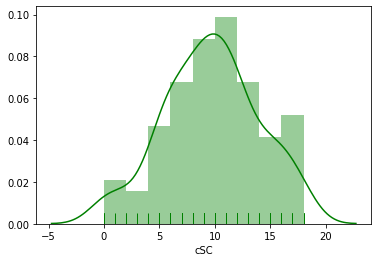

In [53]:
# Plot distribution
sns.distplot(df_conners['cSC'], color='green', rug=True)
# Test data normality
stats.shapiro(df_connors['cSC'])

#### As we can see, half of our conners data is normally distributed, half is not. 
#### Now, let's look at it for our behavioral measure

(0.9379427433013916, 0.00019920496561098844)

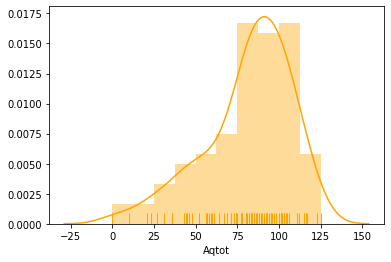

In [55]:
# Plot distribution
sns.distplot(df_behavioral['Aqtot'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqtot'])

(0.927827775478363, 5.3235096856951714e-05)

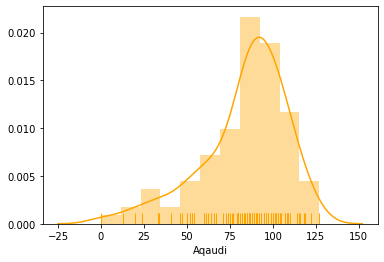

In [56]:
# Plot distribution
sns.distplot(df_behavioral['Aqaudi'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqaudi'])

(0.9181770086288452, 1.639702168176882e-05)

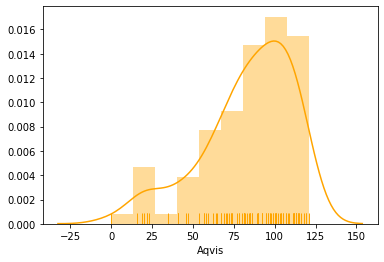

In [57]:
# Plot distribution
sns.distplot(df_behavioral['Aqvis'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqvis'])

(0.9860579967498779, 0.4066457152366638)

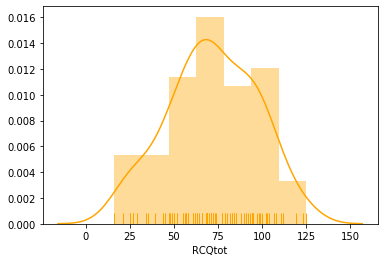

In [58]:
# Plot distribution
sns.distplot(df_behavioral['RCQtot'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQtot'])

(0.9945135712623596, 0.9662332534790039)

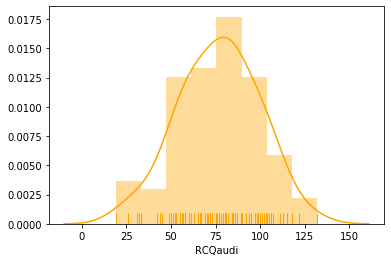

In [59]:
# Plot distribution
sns.distplot(df_behavioral['RCQaudi'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQaudi'])

(0.9807149767875671, 0.16997645795345306)

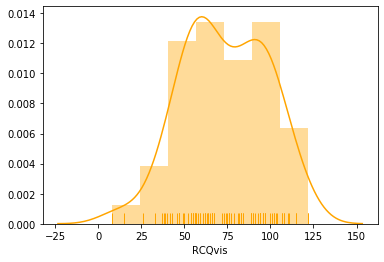

In [60]:
# Plot distribution
sns.distplot(df_behavioral['RCQvis'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQvis'])

#### The Attentionnal quotient (Aq) are not normally distributed, but the Response control quotient (RCQ) is. 
#### Finally, let's look at the eeg distribution, although it should not be normally distributed. Based on  general litterature, there should be increasingly higher power for lower wavebands

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5810763835906982, 0.0)

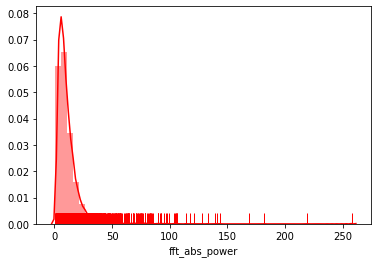

In [61]:
#Must be a better way to plot this one, I'm not sure we're looking at the right stuff
# Plot distribution
sns.distplot(df_eeg['fft_abs_power'], color='red', rug=True)
# Test data normality
stats.shapiro(df_eeg['fft_abs_power'])